In [1]:
# This is a test script to verify the S2SVAE3 model can be used for inference.

import os
import sys
sys.path.append('/home/longshen/work/AccGen/AccGen')
import torch
from models.phrase_vae import load_t5_model_from_lit_ckpt
from models.vae_inference import BarVAE


model = BarVAE()

/home/longshen/programs/miniconda3/envs/accgen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using compress_style: first_n_tokens
Adaptive scale: False


In [2]:
# Prepare tokenizer
from transformers import PreTrainedTokenizerFast
tokenizer_path = 'LongshenOu/phrase-vae-tokenizer'
tok = PreTrainedTokenizerFast.from_pretrained(tokenizer_path)

In [3]:
# Prepare data
from sonata_utils import read_jsonl
jsonl_fp = '/data1/longshen/Datasets/Piano/POP909/jsonl/bar_level/val.jsonl'
data = read_jsonl(jsonl_fp)
bar1 = data[8]
bar2 = data[108]
print(bar1)
print(bar2)

o-0 p-60 d-6 p-55 d-24 p-52 d-24 p-48 d-9 p-36 d-24 o-6 p-60 d-3 p-43 d-9 o-9 p-60 d-6 o-12 p-55 d-9 p-48 d-9 o-18 p-62 d-3 o-21 p-64 d-3 o-24 p-62 d-3 p-52 d-12 p-48 d-12 p-33 d-18 o-30 p-60 d-3 o-33 p-60 d-6 o-36 p-60 d-9 p-57 d-12 p-52 d-12 p-48 d-3 o-42 p-60 d-3 p-48 d-6 o-45 p-62 d-3 b-1
o-0 p-72 d-12 p-33 d-15 o-12 p-71 d-6 p-64 d-12 p-60 d-12 p-57 d-12 o-18 p-72 d-30 p-45 d-3 p-33 d-3 o-24 p-45 d-12 p-33 d-9 o-30 p-64 d-9 p-60 d-9 p-57 d-9 o-42 p-64 d-3 p-60 d-3 p-57 d-6 b-1


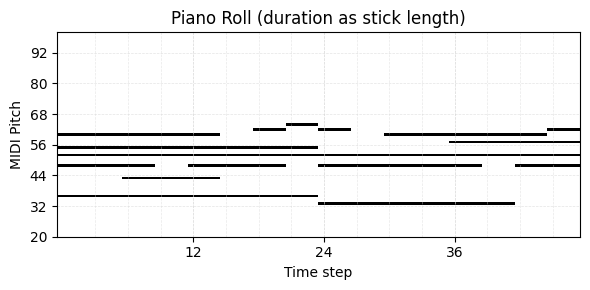

In [4]:
# Draw the two bars
from piano_roll_utils import save_piano_roll
from remi_z import MultiTrack

bar1_mt = MultiTrack.from_remiz_str(bar1)[0]
proll1 = bar1_mt.to_piano_roll(pos_per_bar=48)
save_piano_roll(proll1, 'bar1.png', show=True)

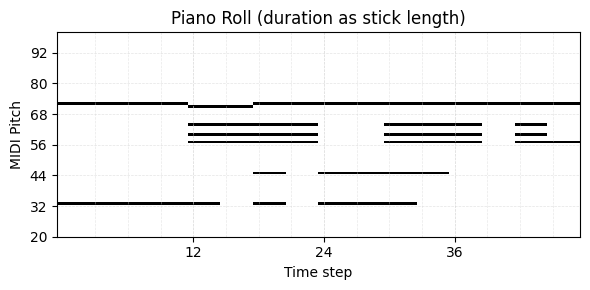

In [5]:
bar2_mt = MultiTrack.from_remiz_str(bar2)[0]
proll2 = bar2_mt.to_piano_roll(pos_per_bar=48)
save_piano_roll(proll2, 'bar2.png', show=True)  

In [6]:
latents = model.encode_batch([bar1, bar2], do_sample=False)
print(latents.shape)

torch.Size([2, 512])


o-0 p-60 d-6 p-55 d-24 p-52 d-24 p-48 d-9 p-36 d-24 o-6 p-60 d-3 p-43 d-9 o-9 p-60 d-6 o-12 p-55 d-9 p-48 d-9 o-18 p-62 d-3 o-21 p-64 d-3 o-24 p-62 d-3 p-52 d-12 p-48 d-12 p-33 d-18 o-30 p-60 d-3 o-33 p-60 d-6 o-36 p-60 d-9 p-57 d-12 p-52 d-12 p-48 d-3 o-42 p-60 d-3 p-48 d-6 o-45 p-62 d-3 b-1
o-0 p-72 d-12 p-33 d-15 o-12 p-71 d-6 p-64 d-12 p-60 d-12 p-57 d-12 o-18 p-72 d-30 p-45 d-3 p-33 d-3 o-24 p-45 d-12 p-33 d-9 o-30 p-64 d-9 p-60 d-9 p-57 d-9 o-42 p-64 d-3 p-60 d-3 p-57 d-6 b-1
i-0 o-0 p-60 d-6 p-55 d-24 p-52 d-24 p-48 d-9 p-36 d-24 o-6 p-60 d-3 p-43 d-9 o-9 p-60 d-6 o-12 p-55 d-9 p-48 d-9 o-18 p-62 d-3 o-21 p-64 d-3 o-24 p-62 d-3 p-52 d-12 p-48 d-12 p-33 d-18 o-30 p-60 d-3 o-33 p-60 d-6 o-36 p-60 d-9 p-57 d-12 p-52 d-12 p-48 d-3 o-42 p-60 d-3 p-48 d-6 o-45 p-62 d-3 b-1
i-0 o-0 p-72 d-12 p-33 d-15 o-12 p-71 d-6 p-64 d-12 p-60 d-12 p-57 d-12 o-18 p-72 d-30 p-45 d-3 p-33 d-3 o-24 p-45 d-12 p-33 d-9 o-30 p-64 d-9 p-60 d-9 p-57 d-9 o-42 p-64 d-3 p-60 d-3 p-57 d-6 b-1


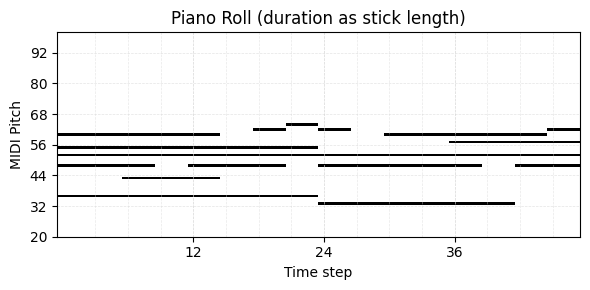

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar1_recon.mid


In [12]:
from sonata_utils import jpath, create_dir_if_not_exist

# Check piano roll reconstruction
recon_str = model.decode_batch(latents)
print(recon_str[0])
print(recon_str[1])
recon_mts = model.decode_batch(latents, return_mt=True)
proll1_rec = recon_mts[0][0].to_piano_roll(pos_per_bar=48)
proll2_rec = recon_mts[1][0].to_piano_roll(pos_per_bar=48)
bar1_rec = recon_mts[0]
bar2_rec = recon_mts[1]

print(bar1_rec.to_remiz_str())
print(bar2_rec.to_remiz_str())

save_piano_roll(proll1_rec, 'bar1_rec.png', show=True)
save_dir = '/home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate'
save_fp = jpath(save_dir, 'bar1_recon.mid')
bar1_rec.to_midi(save_fp, tempo=90)

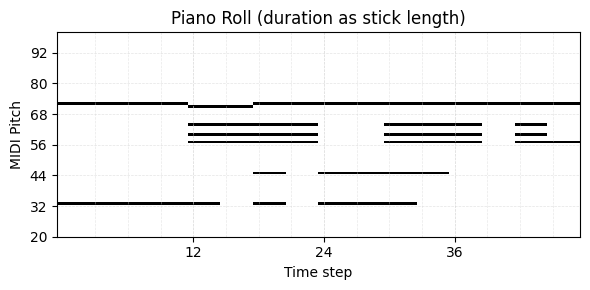

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar2_recon.mid


In [13]:
# Check reconstructed proll2
save_piano_roll(proll2_rec, 'bar2_rec.png', show=True)
save_fp = jpath(save_dir, 'bar2_recon.mid')
bar2_rec.to_midi(save_fp, tempo=90)

torch.Size([512]) torch.Size([512])


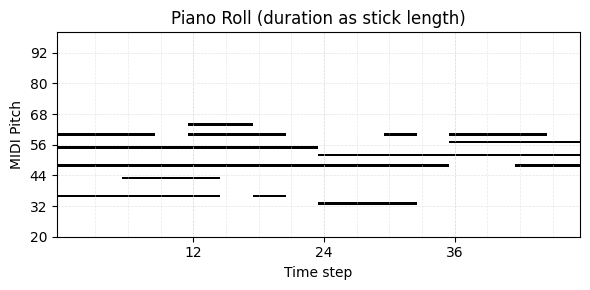

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_avg.mid


In [11]:
# Average the two latents
latents1 = latents[0]
latents2 = latents[1]
print(latents1.shape, latents2.shape)
latents_avg = (latents1 + latents2) / 2
mt_avg = model.decode_batch(latents_avg.unsqueeze(0), return_mt=True)[0]
proll_avg = mt_avg[0].to_piano_roll(pos_per_bar=48)
save_piano_roll(proll_avg, 'bar_avg.png', show=True)

save_dir = '/home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate'
create_dir_if_not_exist(save_dir)
save_fp = jpath(save_dir, 'bar_avg.mid')
mt_avg.to_midi(save_fp, tempo=90)

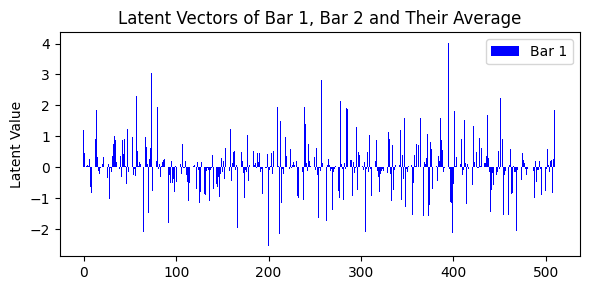

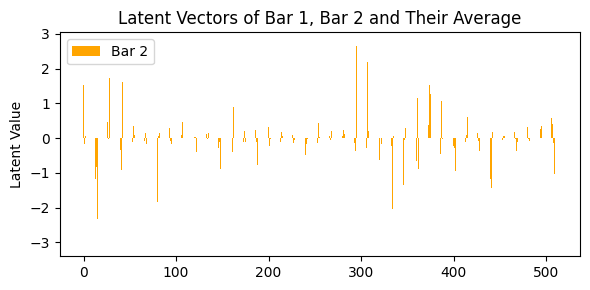

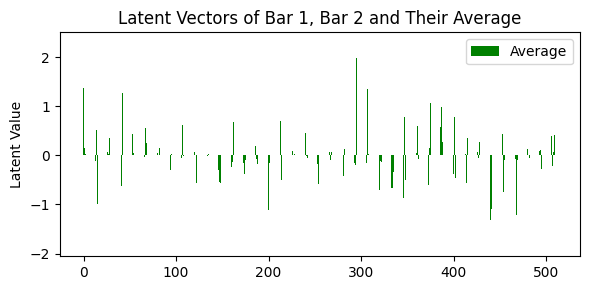

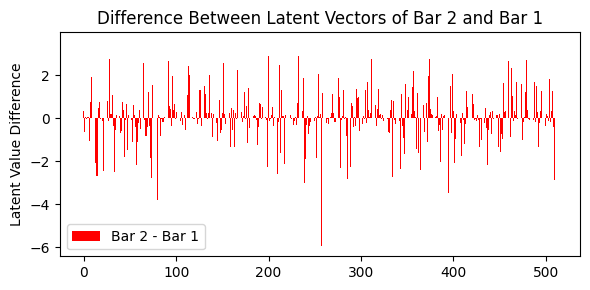

In [25]:
# plot bar chart for three latents
import matplotlib.pyplot as plt
labels = ['Dim {}'.format(i) for i in range(latents1.shape[0])]
x = range(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(6, 3))

# bar plot for latent 1
ax.bar(x, latents1.cpu().numpy(), label='Bar 1', color='blue')  
ax.set_ylabel('Latent Value')
ax.set_title('Latent Vectors of Bar 1, Bar 2 and Their Average')
ax.legend()
plt.tight_layout()
plt.show()

# bar plot for latent 2
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(x, latents2.cpu().numpy(), width=width, label='Bar 2', color='orange')  
ax.set_ylabel('Latent Value')
ax.set_title('Latent Vectors of Bar 1, Bar 2 and Their Average')
ax.legend()
plt.tight_layout()
plt.show()

# bar plot for latent average
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(x, latents_avg.cpu().numpy(), width=width, label='Average', color='green')  
ax.set_ylabel('Latent Value')
ax.set_title('Latent Vectors of Bar 1, Bar 2 and Their Average')
ax.legend()
plt.tight_layout()
plt.show()

# bar plot the difference between bar1 and bar2 latents
latents_diff = latents2 - latents1
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(x, latents_diff.cpu().numpy(), label='Bar 2 - Bar 1', color='red')  
ax.set_ylabel('Latent Value Difference')
ax.set_title('Difference Between Latent Vectors of Bar 2 and Bar 1')
ax.legend()
plt.tight_layout()
plt.show()

In [27]:
# Weighted interpolation
save_dir = '/home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate'
weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
proll_save_dir = jpath(save_dir, 'prolls')
os.makedirs(proll_save_dir, exist_ok=True)
latents1 = latents[0]
latents2 = latents[1]
for w in weights:
    latents_interp = (1-w) * latents1 + w * latents2
    mt_interp = model.decode_batch(latents_interp.unsqueeze(0), return_mt=True)[0]
    proll_interp = mt_interp[0].to_piano_roll(pos_per_bar=48)
    proll_fp = jpath(proll_save_dir, f'bar_interp_w{w:.1f}.png')
    save_piano_roll(proll_interp, proll_fp, show=False)
    midi_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.mid')
    mt_interp.to_midi(midi_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.0.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.1.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.2.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.3.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.4.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.5.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.6.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/bar_interp_w0.7.mid
MIDI file succes

In [28]:
# Do for another pair
from sonata_utils import create_dir_if_not_exist
# random select two bar ids
import numpy as np
id1 = np.random.randint(0, len(data))
id2 = np.random.randint(0, len(data))
bar3 = data[id1]
bar4 = data[id2]
save_dir = '/home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2'
create_dir_if_not_exist(save_dir)

new_latents = model.encode_batch([bar3, bar4], do_sample=False)
bar3_latents = new_latents[0]
bar4_latents = new_latents[1]

weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for w in weights:
    latents_interp = (1-w) * bar3_latents + w * bar4_latents
    mt_interp = model.decode_batch(latents_interp.unsqueeze(0), return_mt=True)[0]
    proll_interp = mt_interp[0].to_piano_roll(pos_per_bar=48)
    proll_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.png')
    midi_fp = jpath(save_dir, f'bar_interp_w{w:.1f}.mid')
    save_piano_roll(proll_interp, proll_fp, show=False)
    mt_interp.to_midi(midi_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.0.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.1.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.2.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.3.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.4.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.5.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interpolate/pair2/bar_interp_w0.6.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/interp

In [30]:
# Sample directly
from sonata_utils import create_dir_if_not_exist
save_dir = '/home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1'
create_dir_if_not_exist(save_dir)
z_random = torch.randn(10, 512)
# scale_factor = 0.723112
# z_random = z_random * scale_factor

dim_mean = torch.load('/data1/longshen/Datasets/Piano/POP909/latents/bar_level/vae3/latent_dim_mean.pt')
dim_std = torch.load('/data1/longshen/Datasets/Piano/POP909/latents/bar_level/vae3/latent_dim_std.pt')
z_random = z_random * dim_std.unsqueeze(0) + dim_mean.unsqueeze(0)

mts = model.decode_batch(z_random, return_mt=True)
for i, mt in enumerate(mts):
    proll = mt[0].to_piano_roll(pos_per_bar=48)
    save_piano_roll(proll, jpath(save_dir, f'bar_sample_{i}.png'))
    save_fp = jpath(save_dir, f'bar_sample_{i}.mid')
    mt.to_midi(save_fp, tempo=90)

MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_0.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_1.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_2.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_3.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_4.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_5.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q/prior_sampling/group1/bar_sample_6.mid
MIDI file successfully written to /home/longshen/work/AccGen/test_outputs/vae/bar_level/4q